<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/CIVE7100_Final_Project_IMF_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-131-f68e88a99d16>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



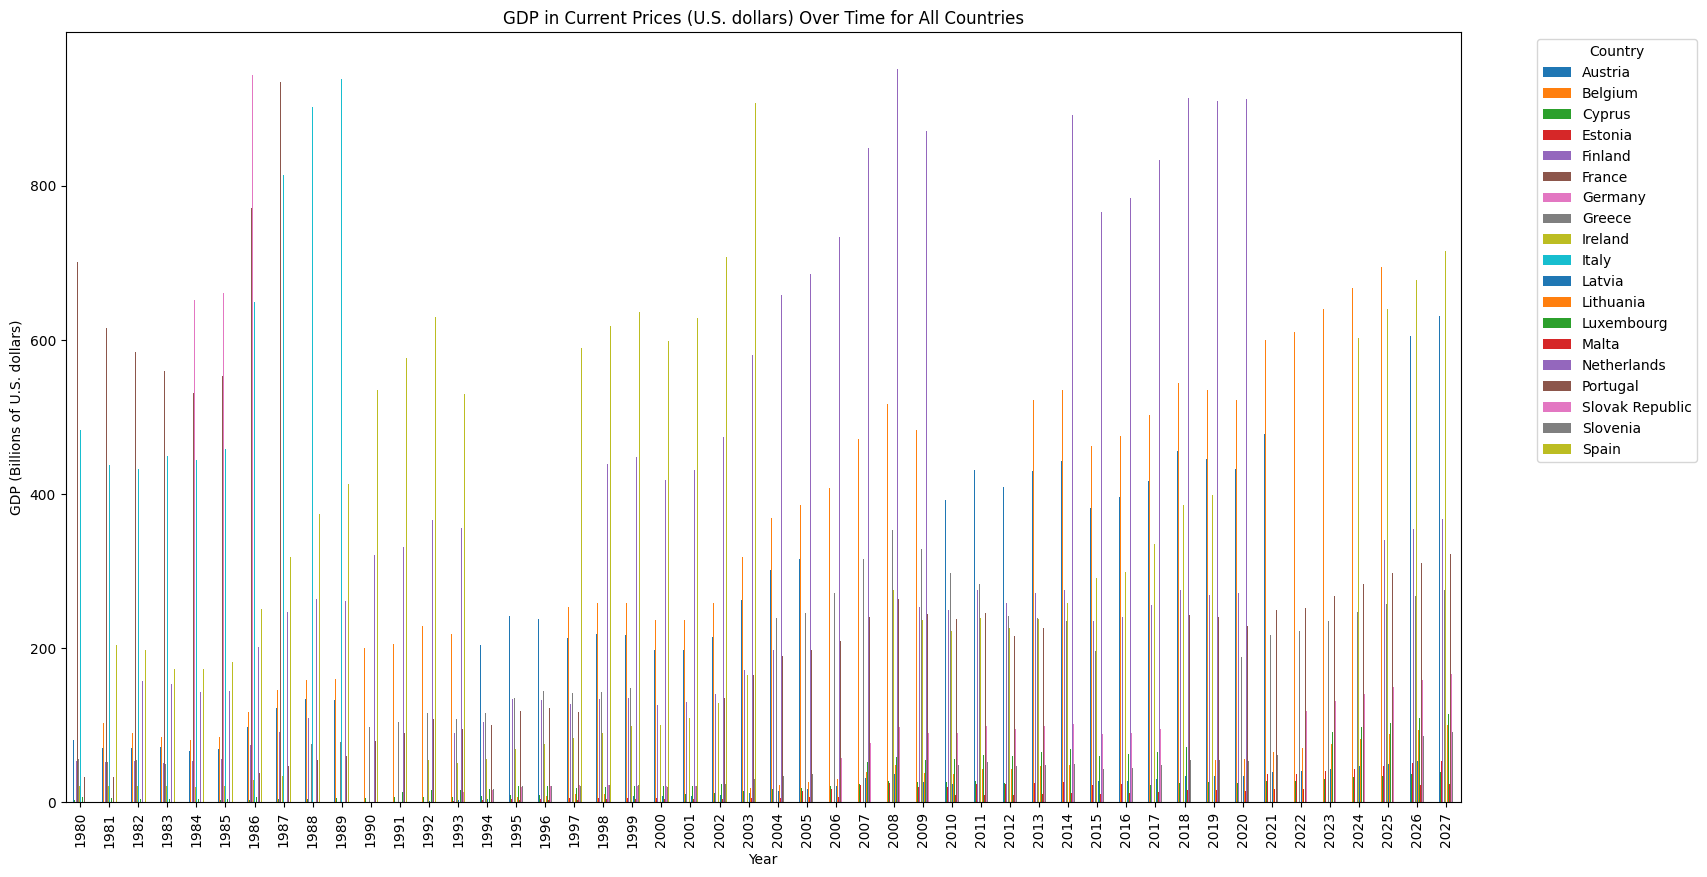

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('WEO_Data-2.csv')

# Filter data for GDP in current prices
gdp_current_prices = df[df['Subject Descriptor'] == 'Gross domestic product, current prices']

# Replace the column names with the relevant years in your dataset
years = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']

# Convert years to numeric
gdp_current_prices[years] = gdp_current_prices[years].apply(pd.to_numeric, errors='coerce')

# Plotting
gdp_current_prices.set_index('Country')[years].T.plot(kind='bar', figsize=(18, 10), title='GDP in Current Prices (U.S. dollars) Over Time for All Countries')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of U.S. dollars)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-132-57a1d01474c8>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



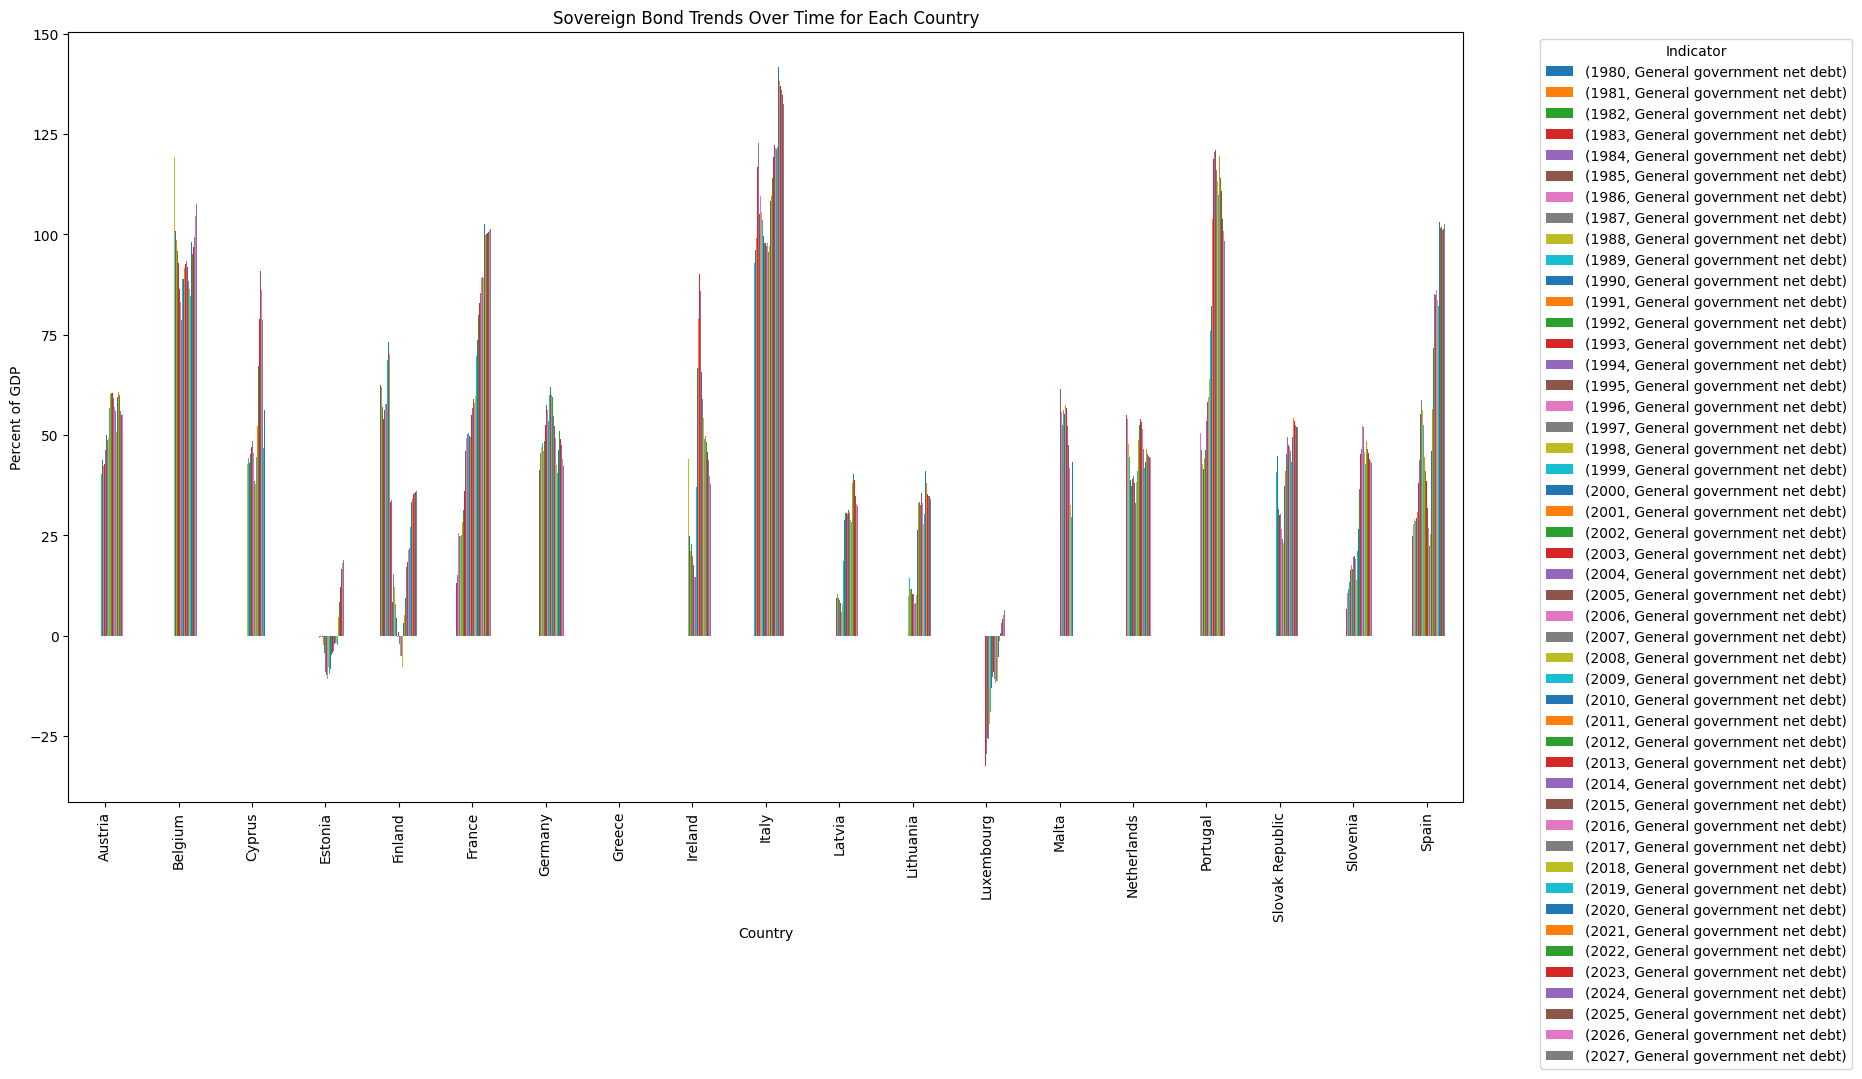

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('WEO_Data-2.csv')

# Filter data for sovereign bond indicators
sovereign_bond_indicators = ['General government net debt']
filtered_df = df[df['Subject Descriptor'].isin(sovereign_bond_indicators)]

# Replace the column names with the relevant years in your dataset
years = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']

# Convert years to numeric
filtered_df[years] = filtered_df[years].apply(pd.to_numeric, errors='coerce')

# Plotting
filtered_df.set_index(['Country', 'Subject Descriptor'])[years].unstack().plot(kind='bar', figsize=(18, 10), title='Sovereign Bond Trends Over Time for Each Country')
plt.xlabel('Country')
plt.ylabel('Percent of GDP')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('bondyieldpercentIMF.csv')

In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 75 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Real long term government bond yield, percent  221 non-null    int64  
 1   Angola                                         6 non-null      float64
 2   Argentina                                      23 non-null     float64
 3   Australia                                      74 non-null     float64
 4   Austria                                        84 non-null     float64
 5   Bangladesh                                     16 non-null     float64
 6   Belgium                                        128 non-null    float64
 7   Benin                                          1 non-null      float64
 8   Brazil                                         21 non-null     float64
 9   Burkina Faso                                   4 non-n

In [ ]:
# Example: Convert data to numeric format
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)  # Replace NaN values with 0


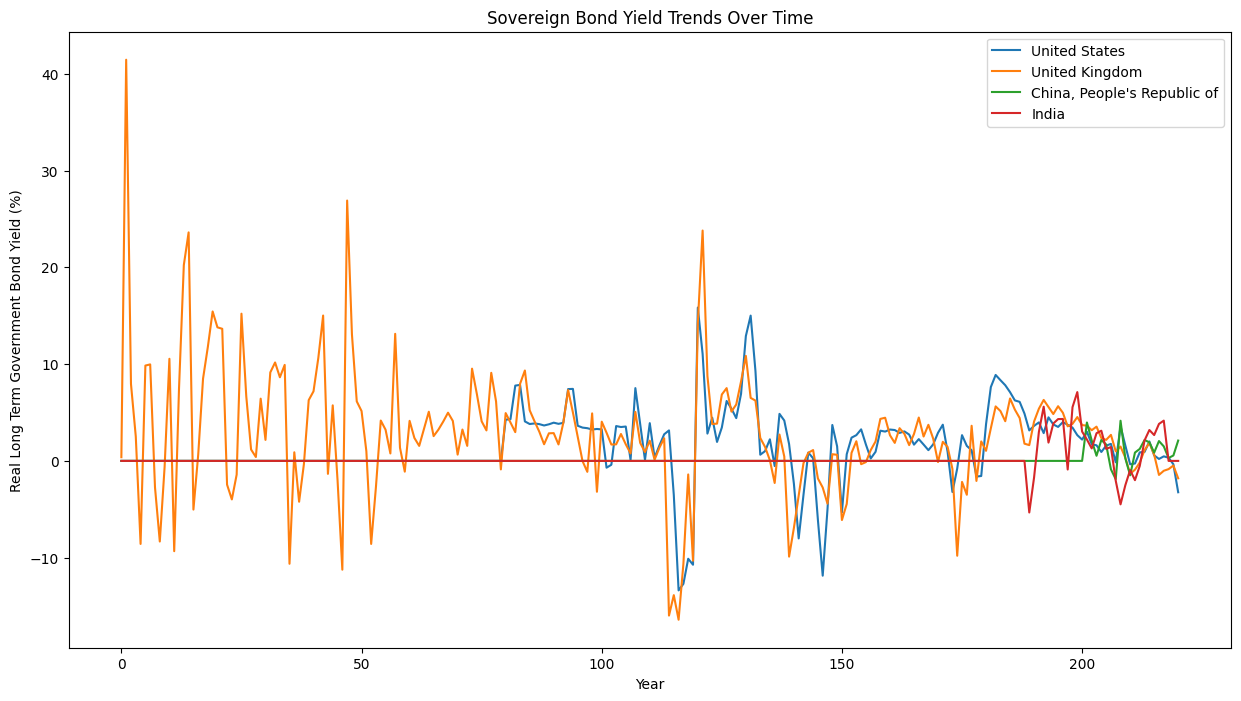

In [ ]:
countries_to_plot = ['United States', 'United Kingdom', 'China, People\'s Republic of', 'India']

plt.figure(figsize=(15, 8))
for country in countries_to_plot:
    plt.plot(df.index, df[country], label=country)

plt.title('Sovereign Bond Yield Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Real Long Term Government Bond Yield (%)')
plt.legend()
plt.show()


In [ ]:
# Example: Calculate average yields for each country
avg_yields = df.mean(axis=0)
print(avg_yields)


Real long term government bond yield, percent    1911.000000
Angola                                              0.075611
Argentina                                           0.310498
Australia                                           0.579095
Austria                                             1.216968
                                                    ...     
Ukraine                                             0.023575
United Kingdom                                      2.865430
United States                                       1.451041
Vanuatu                                             0.765158
Venezuela                                          -0.507738
Length: 75, dtype: float64


In [ ]:
import plotly.express as px

fig = px.line(df, x=df.index, y=df.columns, title='Sovereign Bond Yield Trends Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Real Long Term Government Bond Yield (%)')
fig.show()


In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px

# Reset the index for plotly express compatibility
df_reset = df.reset_index()

fig = px.line(df_reset, x='Real long term government bond yield, percent', y=df_reset.columns[1:],
              title='Sovereign Bond Yield Trends Over Time',
              labels={'value': 'Real Long Term Government Bond Yield (%)'},
              template='plotly_dark')

fig.update_layout(xaxis_title='Year', yaxis_title='Real Long Term Government Bond Yield (%)')
fig.show()


In [ ]:
# Calculate the average yield for each country
average_yield = df.mean(axis=0, skipna=True)

# Select the top N countries with the highest average yields
top_countries = average_yield.nlargest(20).index

# Create a subset dataframe with only the top countries
df_top_countries = df[top_countries]

# Reset the index for plotly express compatibility
df_top_countries_reset = df_top_countries.reset_index()

# Create an interactive line plot
fig_top_countries = px.line(df_top_countries_reset, x='Real long term government bond yield, percent', y=df_top_countries_reset.columns[1:],
                            title='Top Countries with Highest Sovereign Bond Yields Over Time',
                            labels={'value': 'Real Long Term Government Bond Yield (%)'},
                            template='plotly_dark')

fig_top_countries.update_layout(xaxis_title='Year', yaxis_title='Real Long Term Government Bond Yield (%)')
fig_top_countries.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load your transposed dataset
df_transposed = pd.read_csv('transposedbondyield.csv')

# Create a heatmap
fig_heatmap_transposed = px.imshow(df_transposed,
                                   labels=dict(x="Year", y="Country", color="Bond Yield (%)"),
                                   x=df_transposed.columns,
                                   y=df_transposed.index,
                                   color_continuous_scale="Viridis",  # Choose your color scale
                                   title='Sovereign Bond Yield Heatmap Over Time')

fig_heatmap_transposed.update_layout(coloraxis_colorbar=dict(title='Bond Yield (%)'))

fig_heatmap_transposed.show()


In [ ]:
print(df_transposed.columns)

Index(['Country', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808', '1809',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object', length=222)


In [ ]:
import pandas as pd

# Load your transposed dataset
df_transposed = pd.read_csv('transposedbondyield.csv')

# Reshape the data from wide to long format
df_long = pd.melt(df_transposed, id_vars=['Country'], var_name='Year', value_name='Bond_Yield')

# Convert the 'Year' column to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Save the reshaped data to a new CSV file
df_long.to_csv('reshaped_data.csv', index=False)


In [ ]:
! pip install geopandas plotly pandas


In [ ]:
import geopandas as gpd

# Load the GeoDataFrame from the shapefile
world = gpd.read_file('ne_110m_admin_0_countries.shp')

import pandas as pd

df = pd.read_csv('reshaped_data.csv')

# Display the first few rows of the DataFrame to verify it has been loaded correctly
print(df.head())

# Display the columns of the GeoDataFrame
print(world.columns)

# Merge the GeoDataFrame with your DataFrame
merged_df = pd.merge(world, df, left_on='ADMIN', right_on='Country', how='left')

# Replace NaN values in 'Bond_Yield' with a default value (customize based on your requirements)
merged_df['Bond_Yield'].fillna(0, inplace=True)

# Create a GeoJSON file from the GeoDataFrame
geo_json = merged_df.to_json()


      Country  Year  Bond_Yield
0      Angola  1801         NaN
1   Argentina  1801         NaN
2   Australia  1801         NaN
3     Austria  1801         NaN
4  Bangladesh  1801         NaN
Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [ ]:
print(merged_df.head())


        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          6       Fiji    FJI         0      2   
1  Admin-0 country          1          6       Fiji    FJI         0      2   
2  Admin-0 country          1          6       Fiji    FJI         0      2   
3  Admin-0 country          1          6       Fiji    FJI         0      2   
4  Admin-0 country          1          6       Fiji    FJI         0      2   

                TYPE TLC ADMIN  ... FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  \
0  Sovereign country   1  Fiji  ...      None       None      None      None   
1  Sovereign country   1  Fiji  ...      None       None      None      None   
2  Sovereign country   1  Fiji  ...      None       None      None      None   
3  Sovereign country   1  Fiji  ...      None       None      None      None   
4  Sovereign country   1  Fiji  ...      None       None      None      None   

   FCLASS_BD FCLASS_UA                      

In [ ]:
merged_df.to_file("merged_data.geojson", driver="GeoJSON")


In [ ]:
px.set_mapbox_access_token("pk.eyJ1IjoiYWttMjIwOCIsImEiOiJjbG9hbzRnNDkwMXM5MmtucmE0OHdyeGZnIn0.Q0DNY0ncdeT_Tb_ZDJ1AQQ")

In [155]:
print(agg_df)


              ADMIN  Bond_Yield
0       Afghanistan    0.000000
1           Albania    0.000000
2           Algeria    0.000000
3            Angola    0.075611
4        Antarctica    0.000000
..              ...         ...
172  Western Sahara    0.000000
173           Yemen    0.000000
174          Zambia    0.000000
175        Zimbabwe    0.000000
176        eSwatini    0.000000

[177 rows x 2 columns]


In [156]:
# Check the 'ADMIN' column in the GeoDataFrame
print(merged_df['ADMIN'].unique())

# Check the 'ADMIN' column in the aggregated DataFrame
print(agg_df['ADMIN'].unique())


['Fiji' 'United Republic of Tanzania' 'Western Sahara' 'Canada'
 'United States of America' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Democratic Republic of the Congo'
 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti' 'Dominican Republic' 'Russia'
 'The Bahamas' 'Falkland Islands' 'Norway' 'Greenland'
 'French Southern and Antarctic Lands' 'East Timor' 'South Africa'
 'Lesotho' 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia'
 'Panama' 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala'
 'Belize' 'Venezuela' 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico'
 'Jamaica' 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 'Ivory Coast' 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Republic' 'Republic of the Congo' 'Gabon'
 'Equatorial Guinea' 'Zambia' 'Malawi' 'Mozambique' 'eSwatini' 'Angola'
 'Burundi' 'Israel' 'Lebanon' 'Madagascar'

In [158]:
# Unique values in 'ADMIN' column of GeoDataFrame
unique_admin_merged_df = merged_df['ADMIN'].unique()
print("Unique values in 'ADMIN' column of merged_df:", unique_admin_merged_df)

# Unique values in 'ADMIN' column of aggregated DataFrame
unique_admin_agg_df = agg_df['ADMIN'].unique()
print("Unique values in 'ADMIN' column of agg_df:", unique_admin_agg_df)


Unique values in 'ADMIN' column of merged_df: ['Fiji' 'United Republic of Tanzania' 'Western Sahara' 'Canada'
 'United States of America' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Democratic Republic of the Congo'
 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti' 'Dominican Republic' 'Russia'
 'The Bahamas' 'Falkland Islands' 'Norway' 'Greenland'
 'French Southern and Antarctic Lands' 'East Timor' 'South Africa'
 'Lesotho' 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia'
 'Panama' 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala'
 'Belize' 'Venezuela' 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico'
 'Jamaica' 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 'Ivory Coast' 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Republic' 'Republic of the Congo' 'Gabon'
 'Equatorial Guinea' 'Zambia' 'Malawi' 'Mozambique' 'eSwatini' 'Ango

In [160]:
import plotly.io as pio

# Configure the rendering method to display directly in Colab
pio.renderers.default = 'colab'

# Plot the choropleth map with aggregated data
fig = px.choropleth_mapbox(agg_df,
                           geojson=geo_json,
                           locations='ADMIN',
                           color='Bond_Yield',
                           color_continuous_scale="Viridis",
                           mapbox_style="carto-positron",
                           zoom=3, center={"lat": 37.7749, "lon": -122.4194})

fig.update_layout(title_text='Geospatial Heat Map')
fig.show()
